In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Sun_Feb_14_21:12:58_PST_2021
Cuda compilation tools, release 11.2, V11.2.152
Build cuda_11.2.r11.2/compiler.29618528_0


In [2]:
!pip install easyocr
!pip install imutils
!pip install opencv-python-headless==4.1.2.30
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.1 MB/s 
     |████████████████████████████████| 604 kB 33.0 MB/s 
     |████████████████████████████████| 120 kB 41.9 MB/s 
     |████████████████████████████████| 47.6 MB 2.1 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 21.8 MB 48.7 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninsta

In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

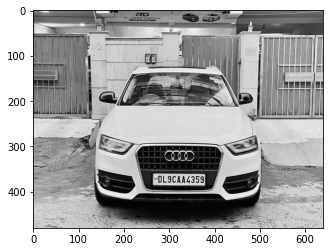

In [4]:
img=cv2.imread('/content/9Y8CICG_99a0a2510e5949a2a4df102fcbf4fd99_1_24014627.webp')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

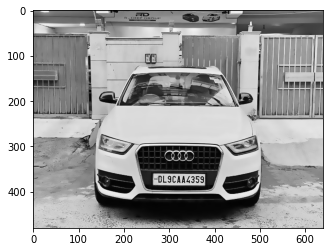

In [5]:
bfilter=cv2.bilateralFilter(gray,11,17,17)  #noise erducton
plt.imshow(cv2.cvtColor(bfilter,cv2.COLOR_BGR2RGB))

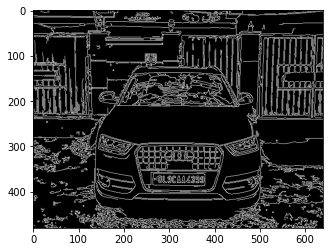

In [6]:
edged=cv2.Canny(bfilter,30,200) #edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [7]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [8]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break     

In [9]:
location

array([[[265, 360]],

       [[267, 385]],

       [[379, 385]],

       [[376, 360]]], dtype=int32)

In [10]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

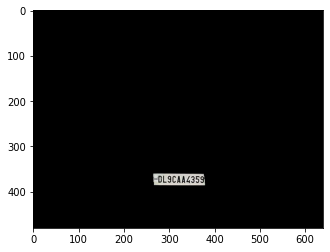

In [11]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [12]:
(x,y)=np.where(mask==255)
(x1,y1)=(np.min(x),np.min(y))
(x2,y2)=(np.max(x),np.max(y))
cropped_image=gray[x1:x2+1,y1:y2+1]

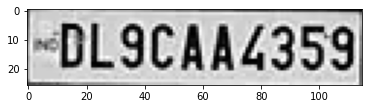

In [13]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [14]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

[([[0, 0], [115, 0], [115, 26], [0, 26]], '~DL9CAAL359', 0.7523654501406671)]

In [15]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)

In [16]:
from geopy.geocoders import Nominatim
print(text[1],text[2])
text3="".join([text[1], text[2]])
# print(text[1],text[2])
loc = Nominatim(user_agent="GetLoc")
getLoc = loc.geocode(text3)
print(getLoc.address)
print("Latitude = ", getLoc.latitude, "\n")
print("Longitude = ", getLoc.longitude)



D L
Delhi, India
Latitude =  28.6273928 

Longitude =  77.1716954


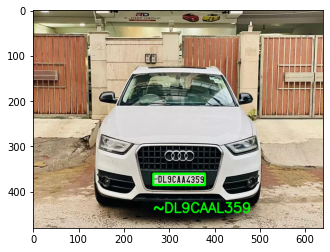

In [17]:
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))